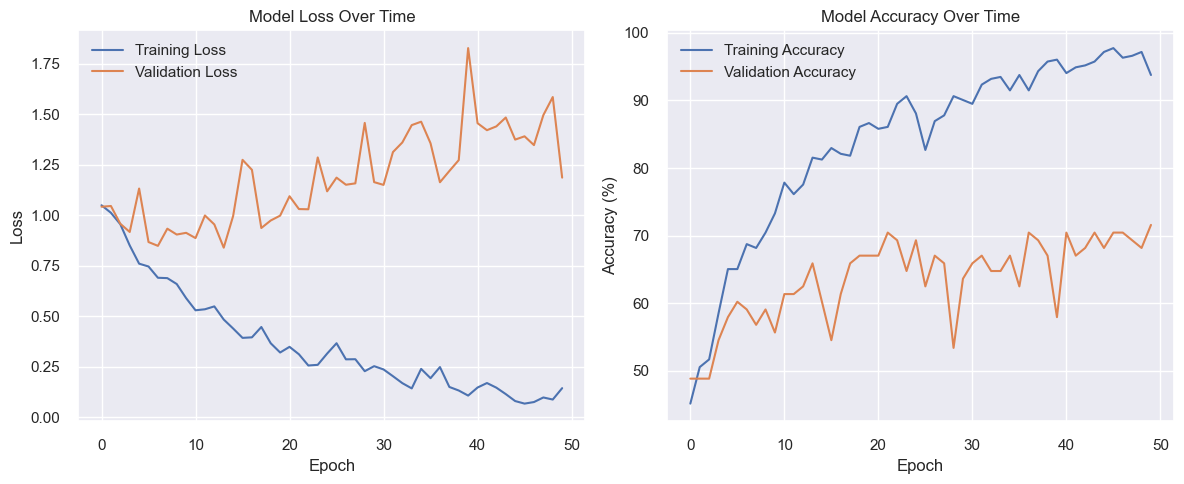

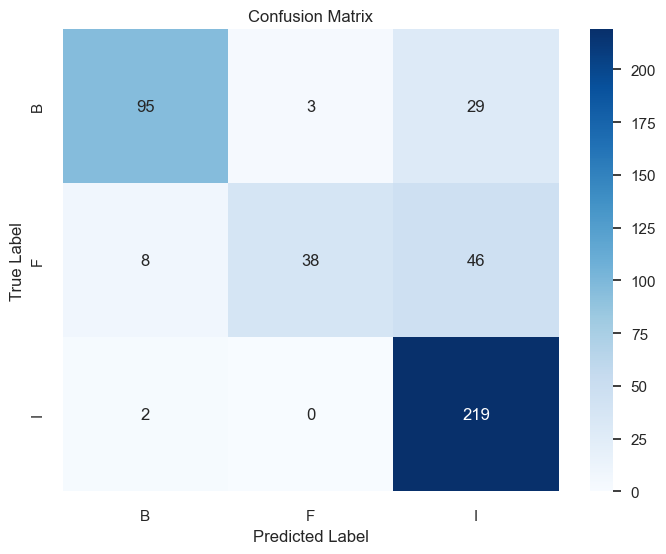


Classification Report:
              precision    recall  f1-score   support

           B       0.90      0.75      0.82       127
           F       0.93      0.41      0.57        92
           I       0.74      0.99      0.85       221

    accuracy                           0.80       440
   macro avg       0.86      0.72      0.75       440
weighted avg       0.83      0.80      0.78       440



In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 设置绘图风格
plt.style.use('seaborn-v0_8')
sns.set_theme()

# 1. 加载训练历史数据
with open('training_history.json', 'r') as f:
    history = json.load(f)

# 2. 绘制训练过程图
plt.figure(figsize=(12, 5))

# 2.1 损失曲线
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['test_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 2.2 准确率曲线
plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Training Accuracy')
plt.plot(history['test_acc'], label='Validation Accuracy')
plt.title('Model Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.savefig('results/training_curves.png')
plt.show()

# 3. 加载预测结果
with open('prediction_results.json', 'r') as f:
    results = json.load(f)

# 4. 绘制混淆矩阵
cm = confusion_matrix(results['true_labels'], results['pred_labels'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['B', 'F', 'I'],
            yticklabels=['B', 'F', 'I'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('results/confusion_matrix.png')
plt.show()

# 5. 打印分类报告
print('\nClassification Report:')
print(classification_report(results['true_labels'], 
                          results['pred_labels'],
                          target_names=['B', 'F', 'I']))